# 3. 采用sklearn 中make_moons 生成半月形数据集，分别采用kmeans 聚类和DBSCAN 聚类，采用matplotlib 绘制图形聚类结果，比较聚类效果。

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


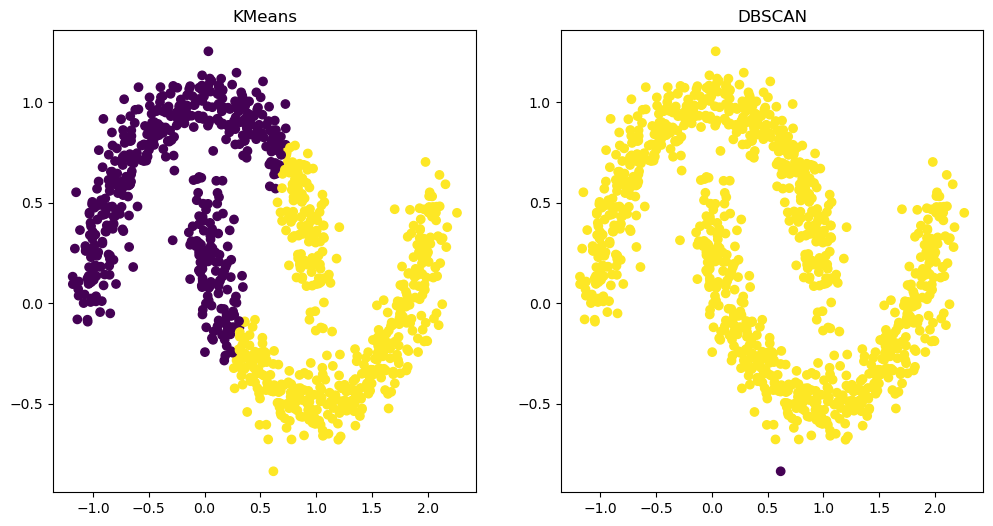

KMeans 混淆矩阵：
[[374 126]
 [120 380]]
DBSCAN 混淆矩阵：
[[  0   0   0]
 [  0 500   0]
 [  1 499   0]]


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import confusion_matrix
import os

os.environ["OMP_NUM_THREADS"] = '4'

X, y = datasets.make_moons(n_samples=1000, noise=0.1)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

dbscan = DBSCAN(eps=0.15)
dbscan.fit(X)
y_dbscan = dbscan.labels_

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.title('KMeans')
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap='viridis')
plt.title('DBSCAN')
plt.show()

print('KMeans 混淆矩阵：')
print(confusion_matrix(y, y_kmeans))
print('DBSCAN 混淆矩阵：')
print(confusion_matrix(y, y_dbscan))